
# Machine Learning on Iris Dataset Part 2: Unsupervised Machine Learning Using Python

In my previous blogpost, I used supervised machine learning to classify the variety of Iris flower. The prediction was based on shape of an iris leaf represented by its sepal length, sepal width, petal length and petal width as shown in the image. However mush such classification problems come without labels and unsupervised machine learning is required to find clusters in the data, based on the features. 

![Iris](./iris.png)


## Understanding and loading the data

I used the dataset from the [DataQuest website](https://www.dataquest.io/m/51/introduction-to-neural-networks) that only contains two species of iris.
The data set consists of:
* **110 samples** 
* **2 labels: species of Iris (Iris virginica_ and _Iris versicolor_)** 
* **4 features: length and the width of the sepals and petals**, in centimetres.



In [82]:
# install relevant modules
import numpy as np
import pandas as pd

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

import seaborn as sns
sns.set(style="white", color_codes=True)

In [83]:
# Read in dataset
iris = pd.read_csv("iris.csv")
# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]
print(iris.head())

    sepal_length  sepal_width  petal_length  petal_width          species
4            6.5          2.8           4.6          1.5  Iris-versicolor
9            5.2          2.7           3.9          1.4  Iris-versicolor
35           6.0          3.4           4.5          1.6  Iris-versicolor
71           5.6          2.8           4.9          2.0   Iris-virginica
50           6.3          3.3           6.0          2.5   Iris-virginica


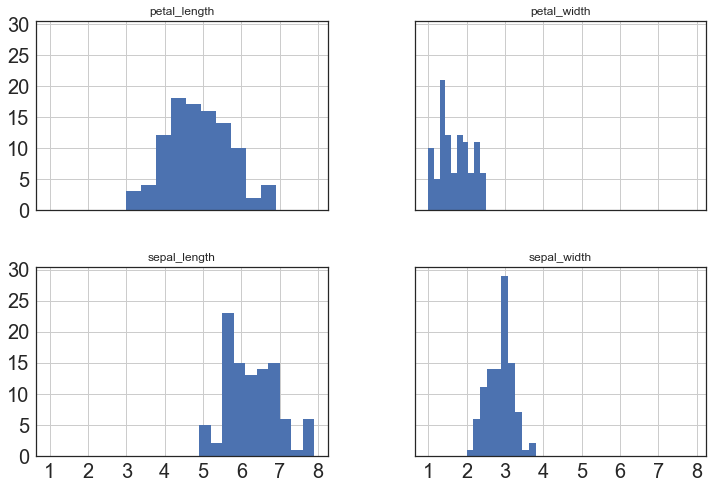

In [84]:
iris.hist(sharey=True, sharex=True, figsize=(12,8), ylabelsize=20, xlabelsize=20)
plt.show()

Its clear from the histograms above that the petal length has the largest variability as opposed to the sepal width which seems to have a much smaller variance.

## Neural Networks

### Define a Neuron

Neural networks are very loosely inspired by the structure of neurons in the human brain. These models are built by using a series of activation units, known as neurons, to make predictions of some outcome. Neurons take in some input, apply a transformation function, and return an output. In the following code cell, we 

1. Write a function called sigmoid_activation with inputs 'x' a feature vector and 'theta' a parameter vector of the same length to implement the sigmoid activation function.

2. Assign the value of sigmoid_activation(x0, theta_init) to a1. a1 should be a vector

In [69]:
# Variables to test sigmoid_activation
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

# The first observation
x0 = X[0]

# Initialize thetas randomly 
theta_init = np.random.normal(0,0.01,size=(5,1))

print(x0, theta_init)

def sigmoid_activation(x, theta):
    sigmoid = 1 / (1 + np.exp(-np.dot(theta.T, x)))
    return(sigmoid)

a1 = sigmoid_activation(x0, theta_init)
print(a1)


[ 1.   5.7  2.9  4.2  1.3] [[ 0.00316014]
 [ 0.00639509]
 [ 0.00283481]
 [-0.00476851]
 [ 0.01162205]]
[ 0.51072686]


### Cost function and gradient


In [72]:
# First observation's features and target
x0 = X[0]
y0 = y[0]

# Initialize parameters, we have 5 units and just 1 layer
theta_init = np.random.normal(0,0.01,size=(5,1))

def single_cost(x, y, theta):
    h = sigmoid_activation(x.T, theta)
    cost = -np.mean(y * np.log(h) + (1-y) * np.log(1-h))
    return(cost)

first_cost = single_cost(x0, y0, theta_init)
print(first_cost)

## Compute the Gradients ##

# Initialize parameters
theta_init = np.random.normal(0,0.01,size=(5,1))

# Store the updates into this array
grads = np.zeros(theta_init.shape)

# Number of observations 
n = X.shape[0]

for j, obs in enumerate(X):
    h = sigmoid_activation(obs, theta_init)
    delta = (y[j]-h) * h * (1-h) * obs
    grads += delta[:,np.newaxis]/X.shape[0]

print(grads)

0.721306269609
[[-0.01110257]
 [-0.11071404]
 [-0.04478248]
 [-0.13550186]
 [-0.06238572]]


### Two-layer Network

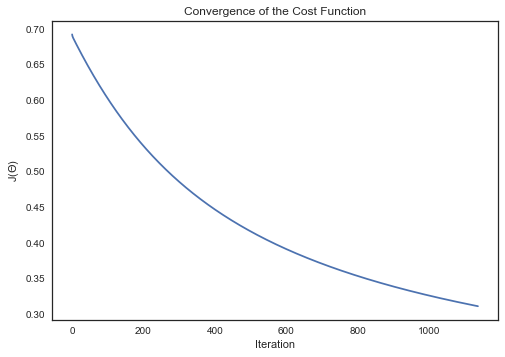

In [75]:
## Two layer network ##
theta_init = np.random.normal(0,0.01,size=(5,1))

# set a learning rate
learning_rate = 0.1

# maximum number of iterations for gradient descent
maxepochs = 10000     

# costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.0001  

def learn(X, y, theta, learning_rate, maxepochs, convergence_thres):
    costs = []
    cost = single_cost(X, y, theta)  # compute initial cost
    costprev = cost + convergence_thres + 0.01  # set an inital costprev to past while loop
    counter = 0  # add a counter
    # Loop through until convergence
    for counter in range(maxepochs):
        grads = np.zeros(theta.shape)
        for j, obs in enumerate(X):
            h = sigmoid_activation(obs, theta)   # Compute activation
            delta = (y[j]-h) * h * (1-h) * obs   # Get delta
            grads += delta[:,np.newaxis]/X.shape[0]  # accumulate
        
        # update parameters 
        theta += grads * learning_rate
        counter += 1  # count
        costprev = cost  # store prev cost
        cost = single_cost(X, y, theta) # compute new cost
        costs.append(cost)
        if np.abs(costprev-cost) < convergence_thres:
            break
        
    plt.plot(costs)
    plt.title("Convergence of the Cost Function")
    plt.ylabel("J($\Theta$)")
    plt.xlabel("Iteration")
    plt.show()
    return theta
        
theta = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)

In [78]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

def feedforward(X, theta0, theta1):
    a1 = sigmoid_activation(X.T, theta0).T
    a1 = np.column_stack([np.ones(a1.shape[0]), a1])
    out = sigmoid_activation(a1.T, theta1)
    return out

h = feedforward(X, theta0_init, theta1_init)

#print(h)

In [79]:
## Multiple neural network cost function ##

theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

# X and y are in memory and should be used as inputs to multiplecost()

def multiplecost(X, y, theta0, theta1):
    h = feedforward(X, theta0, theta1) 
    inner = y * np.log(h) + (1-y) * np.log(1-h)
    return -np.mean(inner)

c = multiplecost(X, y, theta0_init, theta1_init)
print(c)


0.693212792309


### Backpropagation

In [85]:
# Use a class for this model
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then inputted to the output layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break


## Train a Model
### Set a Learning Rate

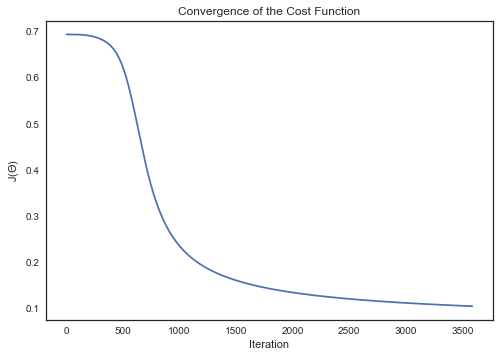

In [89]:
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

### Test-Train Split

In [88]:
# First 70 rows to X_train and y_train
# Last 30 rows to X_train and y_train

X_train = X[:70]
y_train = y[:70]

X_test = X[-30:]
y_test = y[-30:]

#print(X_train, y_train, X_test, y_test)

## Make predictions

In [92]:
## Predicting iris flowers ##

from sklearn.metrics import roc_auc_score
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)

model.learn(X_train, y_train)

yhat = model.predict(X_test)[0]
auc = roc_auc_score(y_test, yhat)
print(auc)

1.0


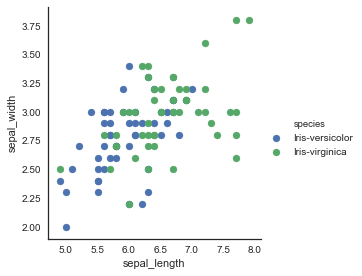

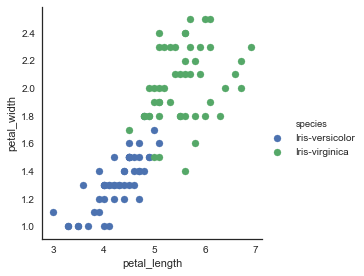

In [93]:
# Scatter plots
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

plt.show()